Customer churn occurs when customers or subscribers stop doing business with a company or service, also known as customer attrition. It is also referred as loss of clients or customers

In [14]:
!pip install tensorflow-gpu==2.8.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 113.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 110.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 71.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existin

In [17]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [41]:
#import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


we're going to predict whether that particular customer is going to exit that particular company or any other bank

In [43]:
# Divide the dataset into independant and depandant features
#i will remove RowNumber and CustomerId, name
#my independent features : CreditScore	Geography	Gender	Age	Tenure	Balance	NumOfProducts	HasCrCard	IsActiveMember	EstimatedSalary
#my dependant features is : exit
X=dataset.iloc[:,3:13]#independent features
y=dataset.iloc[:,13]#dependant features

In [44]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [45]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [46]:
#Feature Engineering : handling the category features
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [47]:
pd.get_dummies(X['Geography'],drop_first=True)#when i use drop_first=True instead of showing all the three columns it will just show the two columns 'Germany' and 'Spain' because if france is present these both will become 0, so we can use this two columns to represent all the three columns itself

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [48]:
#Feature Engineering : handling the category features
geography = pd.get_dummies(X['Geography'],drop_first=True)#when i use drop_first=True instead of showing all the three columns it will just show the two columns 'Germany' and 'Spain' because if france is present these both will become 0, so we can use this two columns to represent all the three columns itself
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [49]:
#concatenate these variables with dataframe
X = X.drop(['Geography','Gender'],axis=1)

In [50]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [51]:
X = pd.concat([X,geography, gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [52]:
#Splitting the dataset into training set and Test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [54]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [55]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [56]:
X_train.shape

(8000, 11)

In [75]:
## Part 2 Now let's create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU,ReLU
from tensorflow.keras.layers import Dropout

In [76]:
#let's initialize the ANN
classifier=Sequential()

In [59]:
##Adding the input layer
classifier.add(Dense(units=11,activation='relu'))#relu we'll be applied to the next layer

In [77]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [78]:
#adding second HL
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [79]:
##Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [80]:
#by default adam uses a learning rate of 0.01
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
#if you want to set the learning rate that you want
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [82]:
#Early stopping : it makes sure when the accuracy is not at all increasing, automatically the training of the model will stop
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,#i do 1 because i need to soo all the details
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [83]:
#train our model
#validation_split says that it's just how many data you're going to validate based on some batch size
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.4905 - accuracy: 0.7897 - val_loss: 0.4235 - val_accuracy: 0.8027
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4272 - accuracy: 0.8181 - val_loss: 0.4077 - val_accuracy: 0.8095
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4144 - accuracy: 0.8265 - val_loss: 0.3897 - val_accuracy: 0.8334
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4064 - accuracy: 0.8302 - val_loss: 0.3781 - val_accuracy: 0.8368
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4059 - accuracy: 0.8337 - val_loss: 0.3816 - val_accuracy: 0.8410
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4100 - accuracy: 0.8294 - val_loss: 0.3729 - val_accuracy: 0.8421
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3972 - accuracy: 0.8332 - val_loss: 0.3704 - val_accuracy:

In [84]:
 model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

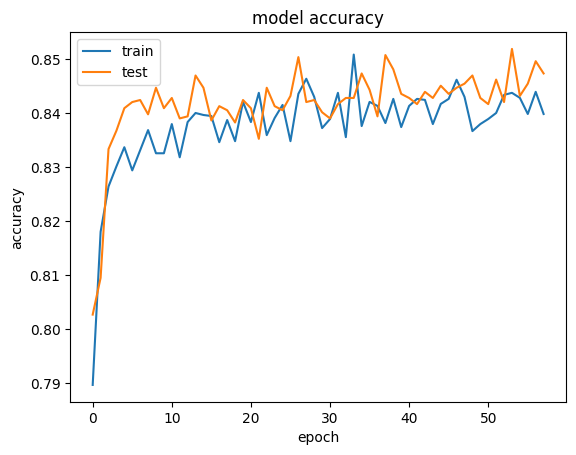

In [85]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

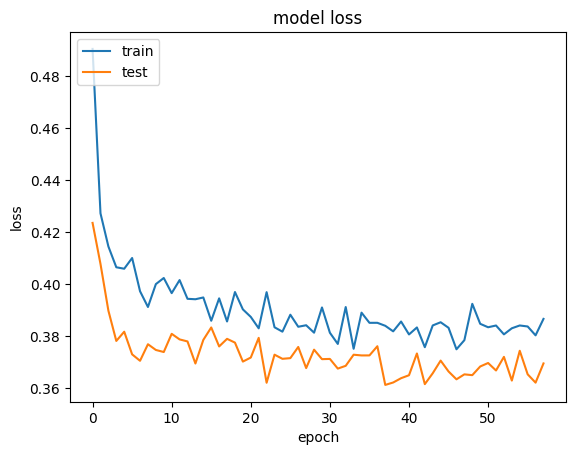

In [86]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
#part 3 - Making the predictions and evaluating the model

#predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [88]:
##make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1554,   41],
       [ 238,  167]])

In [89]:
##calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [90]:
score

0.8605

In [91]:
##get the weights
classifier.get_weights()

[array([[-1.78437591e-01,  6.50527298e-01,  5.22735193e-02,
         -4.90713775e-01,  1.24987558e-01, -2.56800592e-01,
         -1.00043960e-01],
        [ 3.72765869e-01, -3.50143623e+00,  1.99953151e+00,
          6.92290962e-02, -4.05202198e+00,  5.51222444e-01,
          6.45418465e-01],
        [ 5.84214151e-01, -3.38794470e-01, -2.71740496e-01,
         -1.18536755e-01,  1.05704859e-01, -1.76705373e-03,
          3.04785669e-02],
        [-2.80863261e+00, -8.30390692e-01,  2.66806576e-02,
         -2.13921571e+00, -1.92893147e+00,  9.03268933e-01,
         -2.50153327e+00],
        [ 1.37343660e-01,  5.38430274e-01, -3.98347497e-01,
         -3.02197599e+00,  9.69353393e-02,  3.06435895e+00,
         -3.75827384e+00],
        [-3.87895942e-01,  1.01282224e-02,  1.82536036e-01,
         -4.72415894e-01,  2.38794416e-01, -1.48691043e-01,
         -3.01983804e-01],
        [ 1.64498103e+00,  1.64671212e-01, -3.52281809e+00,
         -1.87985957e-01,  6.23931587e-01, -7.83082068e-01